In [254]:
# builtin
import importlib
# internal
import read_data
import train_model
import params
# external
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [255]:
importlib.reload(params)
importlib.reload(read_data)
importlib.reload(train_model)

<module 'train_model' from '/Users/shiyimin/Library/CloudStorage/OneDrive-个人/LLM Opt Pre/call/LGCN_v2/train_model.py'>

### original LGCN

In [226]:
read_data_res = read_data.read_all_data_tri(params.all_para)

Reading data...
Data all read successfully!


In [227]:
read_data_res[8].shape

(8143, 128)

In [228]:
excel_path = '/Users/shiyimin/Desktop/OneDrive/LLM Opt Pre/call/LGCN_v2/experiment_result/MBA_LGCN_20240507_2.xlsx'
F1_max = train_model.train_model(params.all_para[:26], read_data_res, excel_path)

F1_max: 0.068240: 100%|█████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:07<00:00,  2.14s/it]

time cost: 2.1386096947899933


### tri-partite graph LGCN

In [257]:
params.all_para[2]

'LGCN_tri'

In [258]:
read_data_res = read_data.read_all_data_tri(params.all_para)
excel_path = '/Users/shiyimin/Desktop/OneDrive/LLM Opt Pre/call/LGCN_v2/experiment_result/MBA_LGCN_tri_20240507_3.xlsx'
F1_max = train_model.train_model(params.all_para[:26], read_data_res, excel_path)

Reading data...
Data all read successfully!


F1_max: 0.078107: 100%|█████████████████████████████████████████████████████████████████████████████████████| 200/200 [07:28<00:00,  2.24s/it]

time cost: 2.2422891602099844


In [170]:
read_data_res[2:5]

(4297, 3846, 20)

### analysis on the result

In [259]:
lgcn_res = '/Users/shiyimin/Desktop/OneDrive/LLM Opt Pre/call/LGCN_v2/experiment_result/MBA_LGCN_20240507_2.xlsx'
tri_lgcn_res = '/Users/shiyimin/Desktop/OneDrive/LLM Opt Pre/call/LGCN_v2/experiment_result/MBA_LGCN_tri_20240507_3.xlsx'

In [260]:
lgcn_f1_df = pd.read_excel(lgcn_res, sheet_name='F1')
lgcn_ndcg_df = pd.read_excel(lgcn_res, sheet_name='NDCG')

lgcn_tri_f1_df = pd.read_excel(tri_lgcn_res, sheet_name='F1')
lgcn_tri_ndcg_df = pd.read_excel(tri_lgcn_res, sheet_name='NDCG')

#### 1. compare f1

In [261]:
lgcn_f1_df.max(), lgcn_tri_f1_df.max()

(Unnamed: 0    200.000000
 2               0.068240
 5               0.090767
 10              0.094013
 20              0.090874
 50              0.070369
 100             0.054516
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.078107
 5               0.100544
 10              0.103931
 20              0.097333
 50              0.078035
 100             0.058767
 dtype: float64)

improved rate: [0.14459707 0.10771316 0.10549495 0.07107803 0.10893937 0.0779793 ]


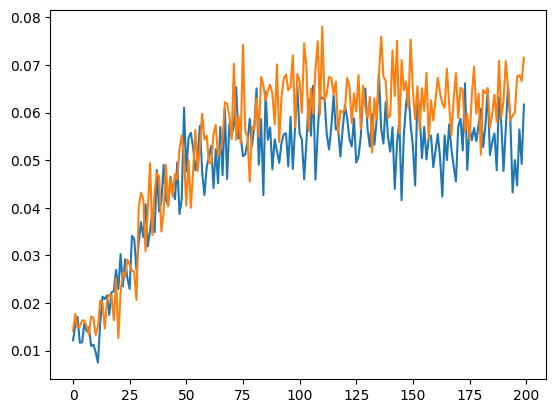

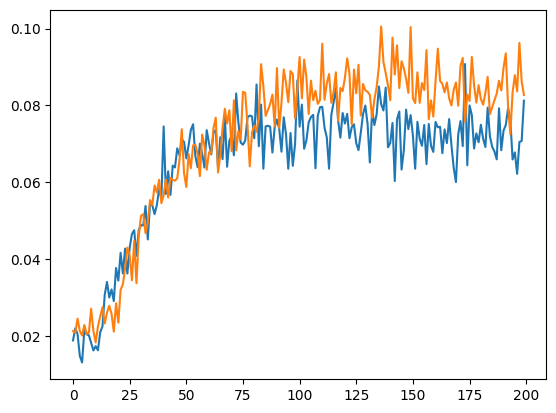

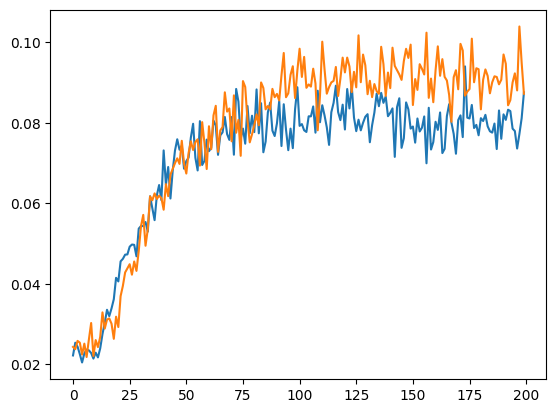

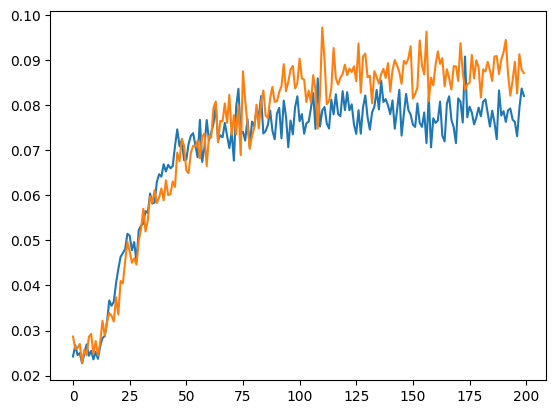

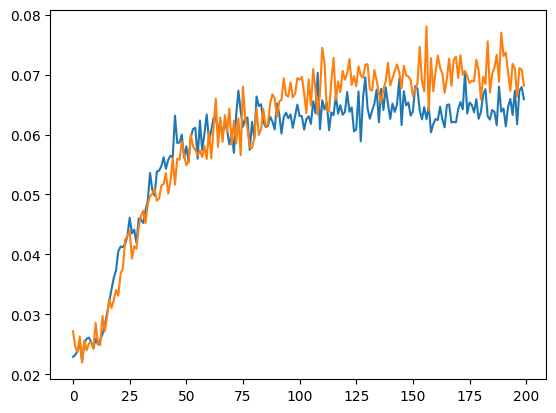

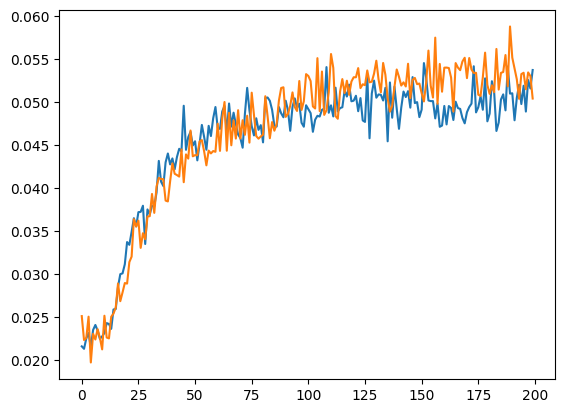

In [262]:
a1 = np.array(lgcn_f1_df.max().tolist()[1:])
a2 = np.array(lgcn_tri_f1_df.max().tolist()[1:])
print(f'improved rate: {a2/a1-1}')
for k in [2,5,10,20,50,100]:
    plt.plot(lgcn_f1_df[k].tolist())
    plt.plot(lgcn_tri_f1_df[k].tolist())
    plt.show()

#### 2. compare ndcg

In [263]:
lgcn_ndcg_df.max(), lgcn_tri_ndcg_df.max()

(Unnamed: 0    200.000000
 2               0.144266
 5               0.138450
 10              0.145575
 20              0.169979
 50              0.211050
 100             0.247288
 dtype: float64,
 Unnamed: 0    200.000000
 2               0.163991
 5               0.154973
 10              0.163738
 20              0.187463
 50              0.225640
 100             0.258545
 dtype: float64)

improved rate: [0.13672769 0.11934016 0.12476706 0.10286248 0.0691284  0.04552365]


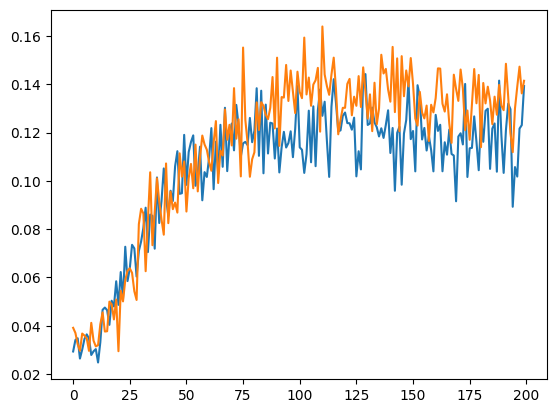

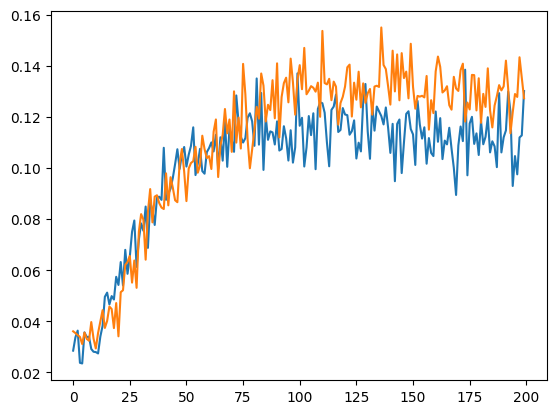

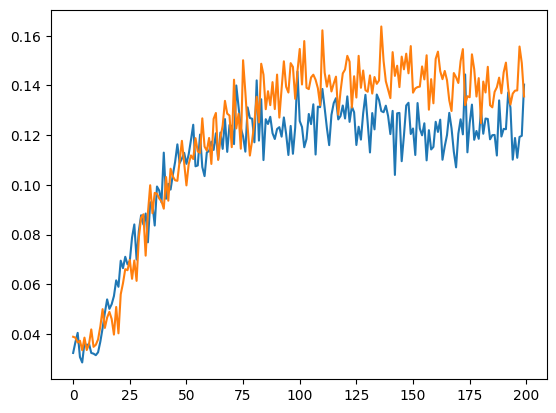

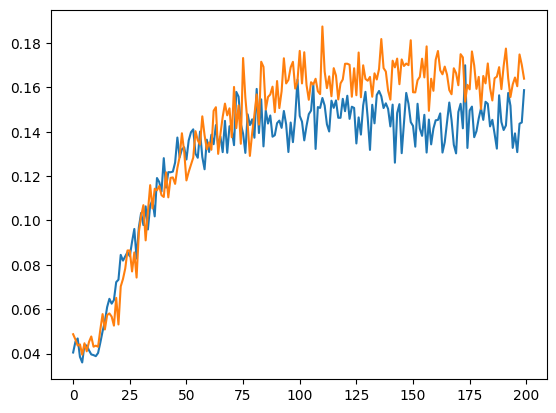

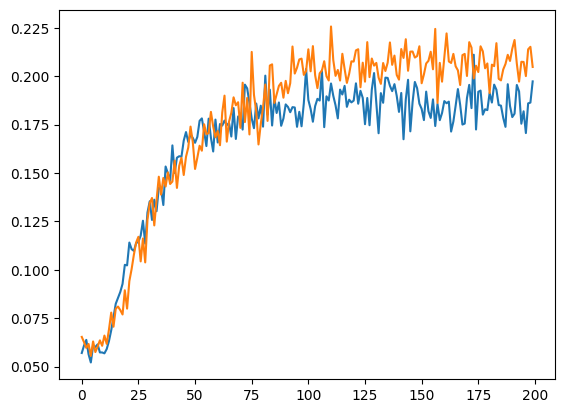

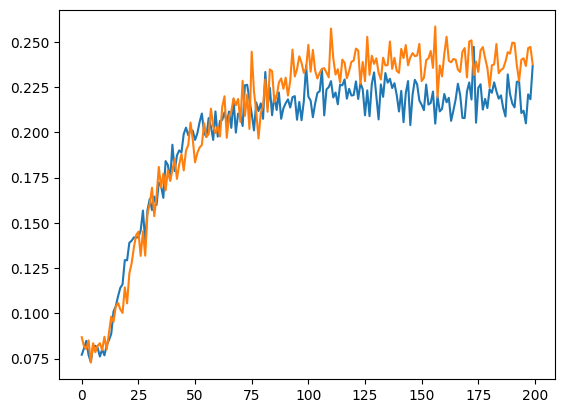

In [264]:
a1 = np.array(lgcn_ndcg_df.max().tolist()[1:])
a2 = np.array(lgcn_tri_ndcg_df.max().tolist()[1:])
print(f'improved rate: {a2/a1-1}')
for k in [2,5,10,20,50,100]:
    plt.plot(lgcn_ndcg_df[k].tolist())
    plt.plot(lgcn_tri_ndcg_df[k].tolist())
    plt.show()